In [51]:
from importlib import reload
import utils_tf as u
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
import IPython
import IPython.display
import matplotlib as mpl
import pandas as pd
import seaborn as sns

reload(u)

# This file is used to configure settings use for training

path = "./data/all_data.csv"
df = pd.read_csv(path)

df_cons = df[["y"]]
df_cons = df_cons.dropna()

# column_indices = {name: i for i, name in enumerate(df_cons.columns)}

n = len(df_cons)
train_df = df_cons[0 : int(n * 0.7)]
val_df = df_cons[int(n * 0.7) : int(n * 0.9)]
test_df = df_cons[int(n * 0.9) :]

num_features = 1

train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [52]:
lstm_model = keras.models.load_model("lstm_model.h5")

In [53]:
wide_RNN_window = u.WindowGenerator(
    input_width=200, label_width=200, shift=1,
    label_columns=['y'])

In [54]:
val_performance = {}
performance = {}

val_performance['LSTM'] = lstm_model.evaluate(wide_RNN_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_RNN_window.test, verbose=0)

542/542 [==============================] - 18s 31ms/step - loss: 0.0020 - root_mean_squared_error: 0.0446


In [55]:
val_performance

{'LSTM': [0.0019897304009646177, 0.04460638016462326]}

In [56]:
performance

{'LSTM': [0.0017735237488523126, 0.042113207280635834]}

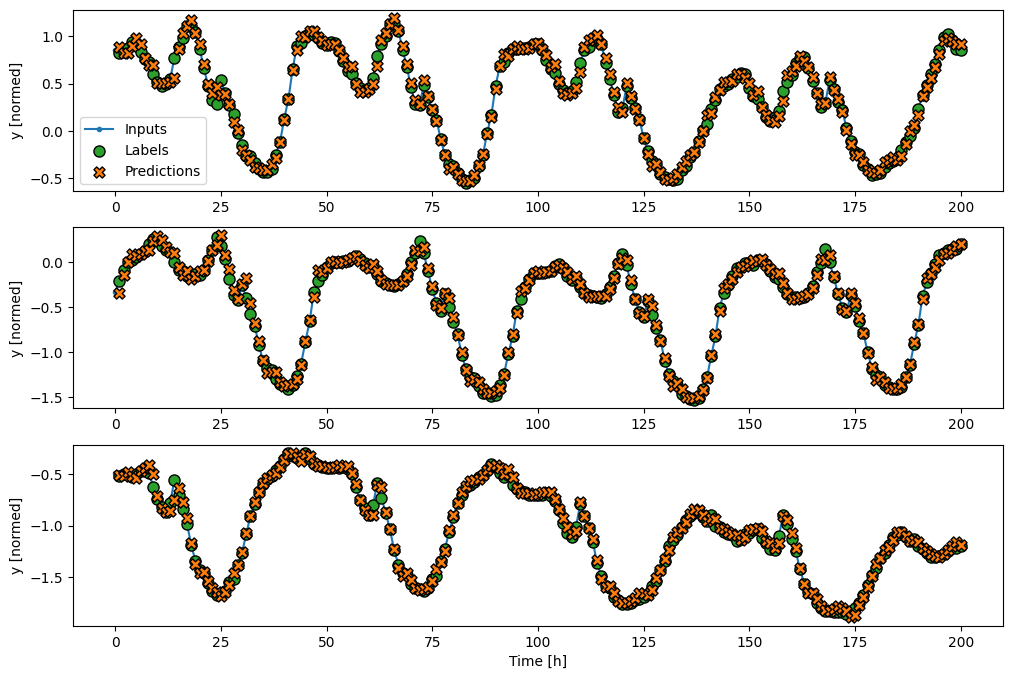

In [57]:
wide_RNN_window.plot(lstm_model)

In [58]:
less_wide_RNN_window = u.WindowGenerator(
    input_width=50, label_width=50, shift=1,
    label_columns=['y'])

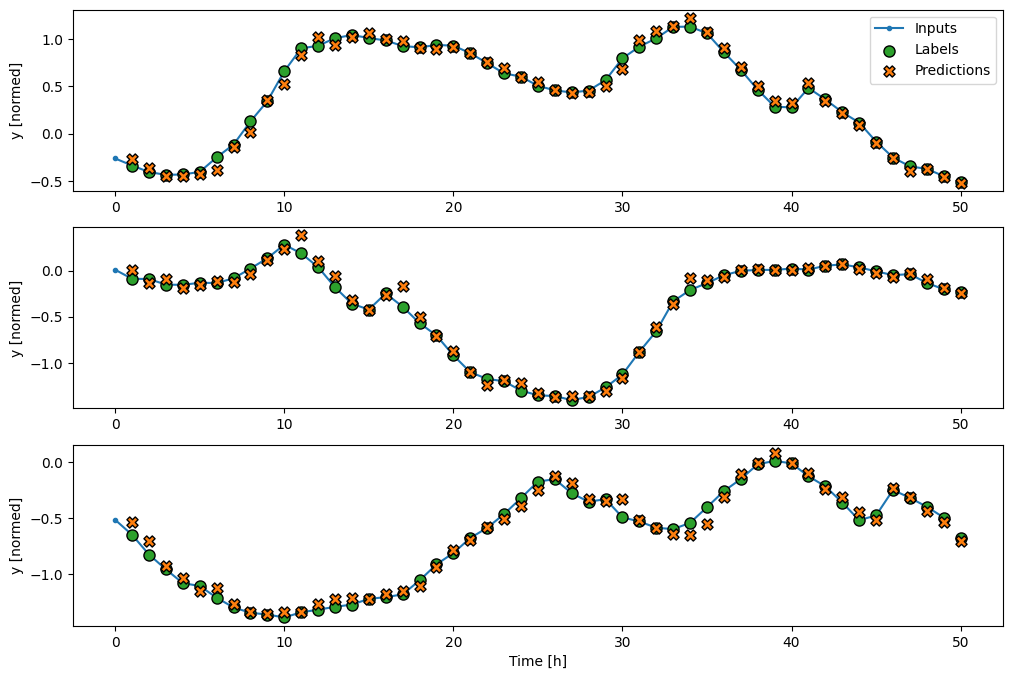

In [59]:
less_wide_RNN_window.plot(lstm_model)

In [60]:
inputs, labels = wide_RNN_window.example
predictions = lstm_model(inputs)
predictions.shape

TensorShape([32, 200, 1])

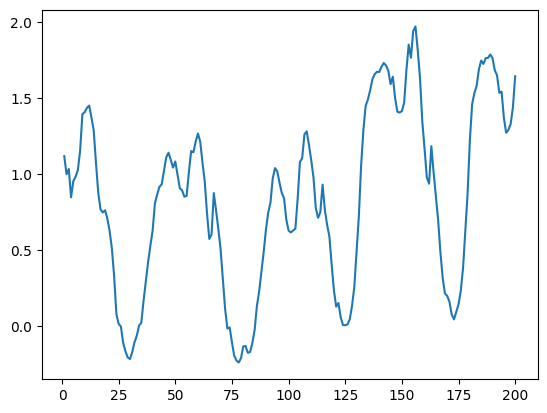

In [71]:
plot_col_index = wide_RNN_window.column_indices["y"]
if wide_RNN_window.label_columns:
    label_col_index = wide_RNN_window.label_columns_indices.get("y", None)
else:
    label_col_index = plot_col_index
plt.plot(wide_RNN_window.label_indices,predictions[31, :, label_col_index])

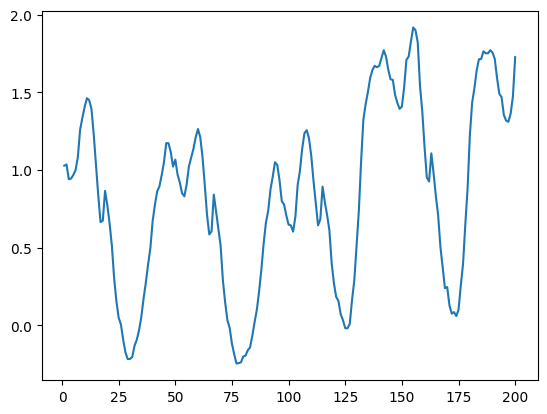

In [68]:
plt.plot(wide_RNN_window.label_indices,
                labels[31, :, label_col_index])

In [78]:
error = predictions - labels
error[1][1]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.05574048], dtype=float32)>

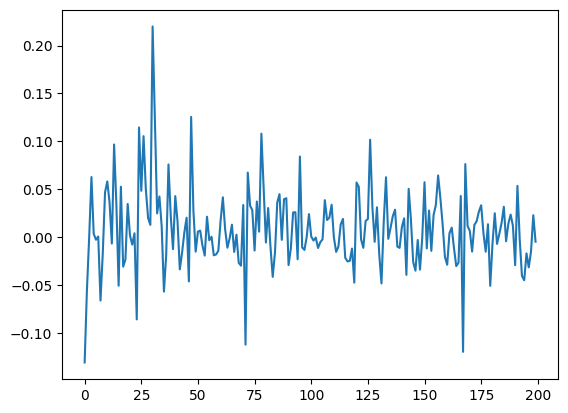

In [82]:
e = predictions[1, :, label_col_index] - labels[1, :, label_col_index] 
plt.plot(e)